In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
covid_dataset = pd.read_csv('/content/StatewiseTestingDetails.csv')

In [ ]:
covid_dataset.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [ ]:
covid_dataset.shape

(14098, 5)

In [ ]:
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14098 entries, 0 to 14097
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          14098 non-null  object 
 1   State         14098 non-null  object 
 2   TotalSamples  14098 non-null  float64
 3   Negative      6348 non-null   object 
 4   Positive      5503 non-null   float64
dtypes: float64(2), object(3)
memory usage: 550.8+ KB


In [ ]:
covid_dataset.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        7750
Positive        8595
dtype: int64

In [ ]:
covid_dataset['Positive'].fillna(covid_dataset['Positive'].mean(), inplace= True)

In [ ]:
covid_dataset.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        7750
Positive           0
dtype: int64

In [ ]:
z= covid_dataset.drop(columns='Negative', axis = 1, inplace= True)
w = covid_dataset.drop(columns= 'Date', axis=1 , inplace= True)
t = covid_dataset.drop(columns= 'State', axis=1 , inplace= True)

In [ ]:
covid_dataset.head()

,TotalSamples,Positive
0,1403.0,12.0
1,2679.0,27.0
2,2848.0,33.0
3,3754.0,33.0
4,6677.0,33.0


In [ ]:
X = covid_dataset.drop(columns='Positive', axis=1)
Y = covid_dataset['Positive']

In [ ]:
print(X)
print(Y)

       TotalSamples
0            1403.0
1            2679.0
2            2848.0
3            3754.0
4            6677.0
...             ...
14093    12645747.0
14094    12716953.0
14095    12789625.0
14096    12859678.0
14097    12919787.0

[14098 rows x 1 columns]
0           12.000000
1           27.000000
2           33.000000
3           33.000000
4           33.000000
             ...     
14093    53171.013265
14094    53171.013265
14095    53171.013265
14096    53171.013265
14097    53171.013265
Name: Positive, Length: 14098, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=2)

In [ ]:
lin_reg_model  = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.013341629153508006


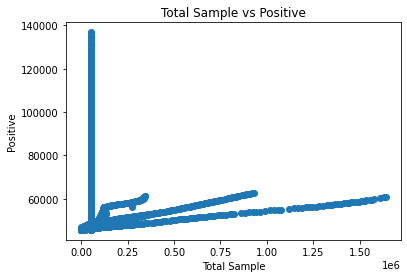

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Total Sample')
plt.ylabel('Positive')
plt.title('Total Sample vs Positive')
plt.show()

In [ ]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.013491912719612031


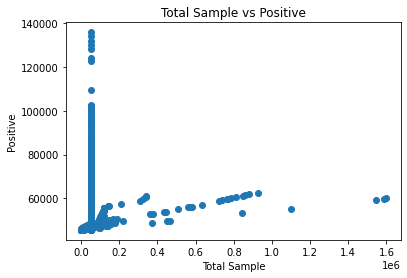

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Total Sample')
plt.ylabel('Positive')
plt.title('Total Sample vs Positive')
plt.show()